# Example

Importing the package (once installation is complete):

In [1]:
import EdiHeadyTrack as eht

Navigating to path from which video files will be accessed:

In [2]:
import os
os.chdir('..')
print(os.getcwd())

/Users/thomas/Library/CloudStorage/OneDrive-UniversityofEdinburgh/PhD/1. Working/1. Computational/EdiHeadyTrack - PACKAGE SOURCE


Select a video in which camera calibration is performed and create a calibrated camera object:

In [3]:
calibration_video = eht.Video(filename='EdiHeadyTrack/resources/calibration_example.mp4')
calibrated_camera = eht.Camera().calibrate(checkerboard=(9,6), video=calibration_video)

------------------------------------------------------------------------------------------------------------------------
Creating Calibrator object for video EdiHeadyTrack/resources/calibration_example.mp4:                           14:56:23
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------
Video data:
------------------------------------------------------------
Video resolution: 1920 x 1080 pixels
Length of video: 917 frames
Framerate: 60 fps
------------------------------------------------------------
Checkerboard created
Checkerboard dimensions: 9 x 6
Displaying video...
Number of frames used for calibration: 51
------------------------------------------------------------------------------------------------------------------------
Calibrator object complete!                                                                                     14:56:33
---

Create video object to perform tracking on, and perform head tracking using chosen face detector from 'facedetector' module:

In [4]:
tracking_video = eht.Video(filename='EdiHeadyTrack/resources/header1.mp4')
mediapipe = eht.MediaPipe(video=tracking_video, camera=calibrated_camera)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


------------------------------------------------------------------------------------------------------------------------
Creating MediaPipe object for video EdiHeadyTrack/resources/header1.mp4:                                        14:56:33
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------
Video data:
------------------------------------------------------------
Video resolution: 720 x 1280 pixels
Length of video: 715 frames
Framerate: 240 fps
------------------------------------------------------------
<class 'module'> <class 'module'>
Running MediaPipe Face Mesh on selected video...


 99%|█████████▉| 707/715 [00:31<00:00, 22.73it/s]

Face tracking complete...
------------------------------------------------------------------------------------------------------------------------
MediaPipe object complete!                                                                                      14:57:05
------------------------------------------------------------------------------------------------------------------------


Create a filter to be applied to signals: 

In [5]:
filter = eht.Filter().low_pass_butterworth(fs=4000, lowcut=160, order=4)

Create a Head object and apply the above filter:

In [6]:
head = eht.Head(facedetector=mediapipe, id='MP').apply_filter(filter)

------------------------------------------------------------------------------------------------------------------------
Creating Head object for MediaPipe Face Detector with video EdiHeadyTrack/resources/header1.mp4:                14:57:05
------------------------------------------------------------------------------------------------------------------------
Computing head pose from tracking data...
------------------------------------------------------------------------------------------------------------------------
Head object complete!                                                                                           14:57:05
------------------------------------------------------------------------------------------------------------------------


Load data from a chosen IMU using a class from the imu module:

In [7]:
wax9 = eht.Wax9(filename='EdiHeadyTrack/resources/example_imu.csv', time_offset=-59.335, id='WAX-9')

Create a list of key times for showing video frames, and create a comparison plot:

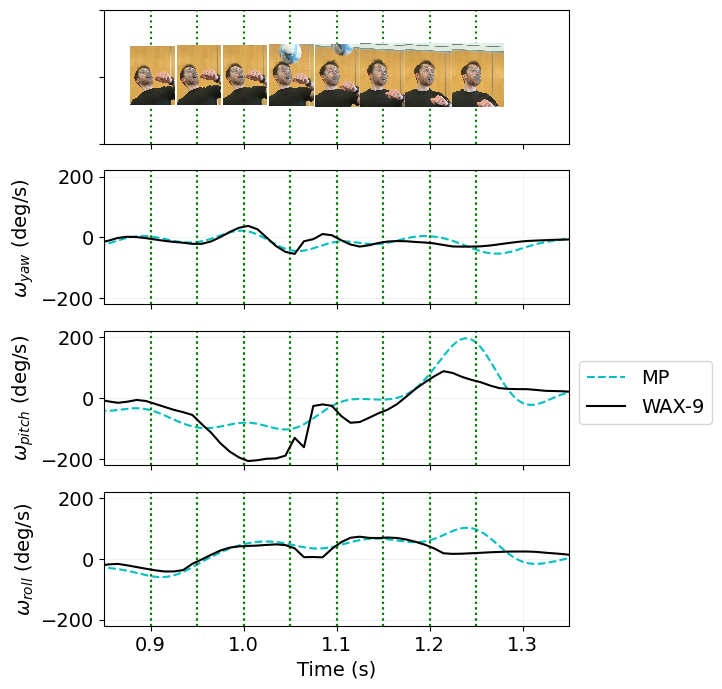

In [8]:
key_times = [0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25]
comparison_plot = eht.Plot().plot_comparison('velocity', (0.85, 1.35), (-220, 220), key_times, head, wax9)